# **Data Loading**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [3]:
url = 'https://raw.githubusercontent.com/charlotteyipr/Pub/main/diabetes.csv'
data = pd.read_csv(url)

In [4]:
data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
data[pd.isnull(data).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# **Vizualization**

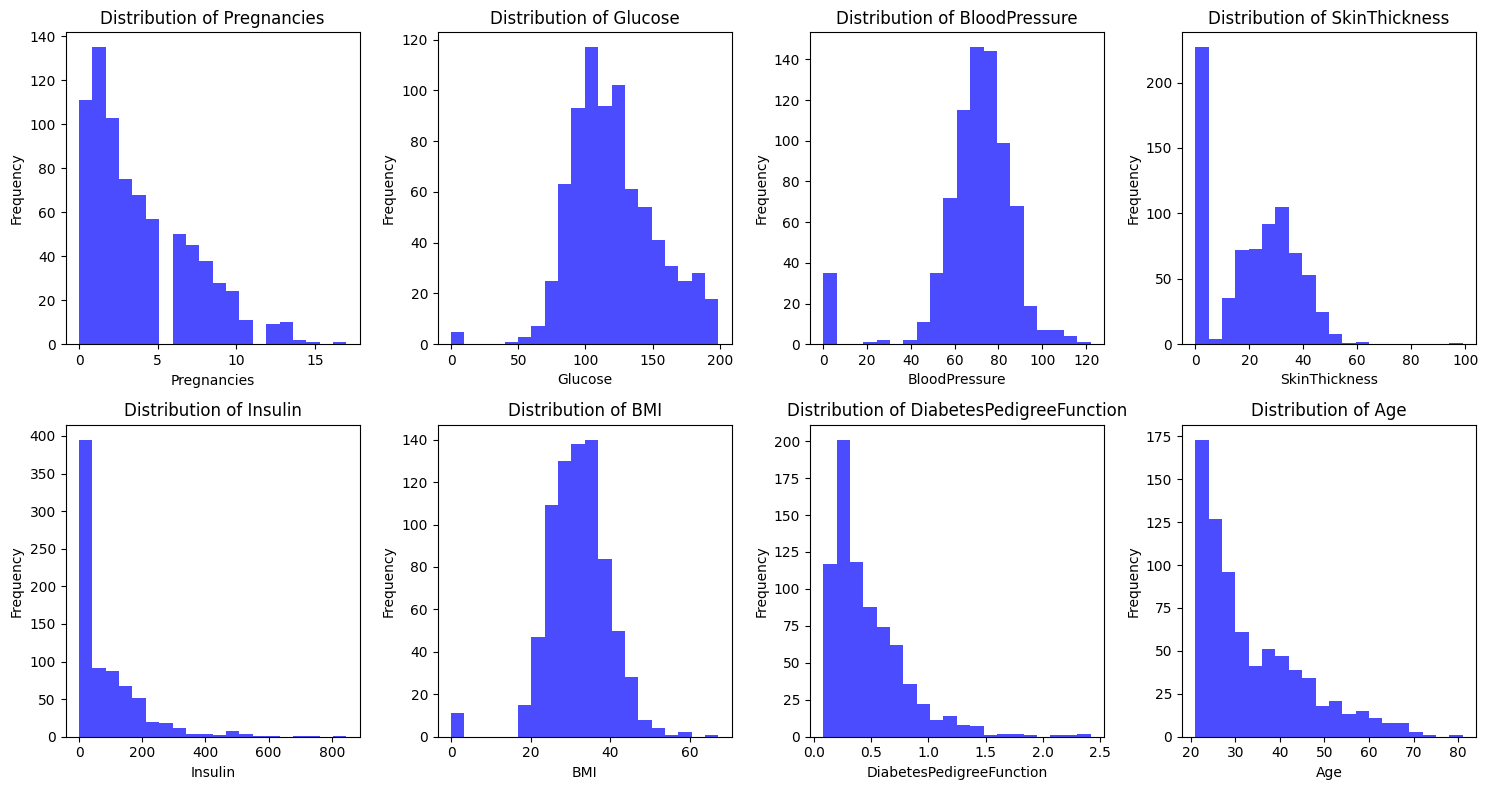

In [ ]:
# List of variables to plot
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a histogram for each variable
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 4, i)  # Create subplots in a 3x3 grid
    plt.hist(data[variable], bins=20, alpha=0.7, color='blue')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

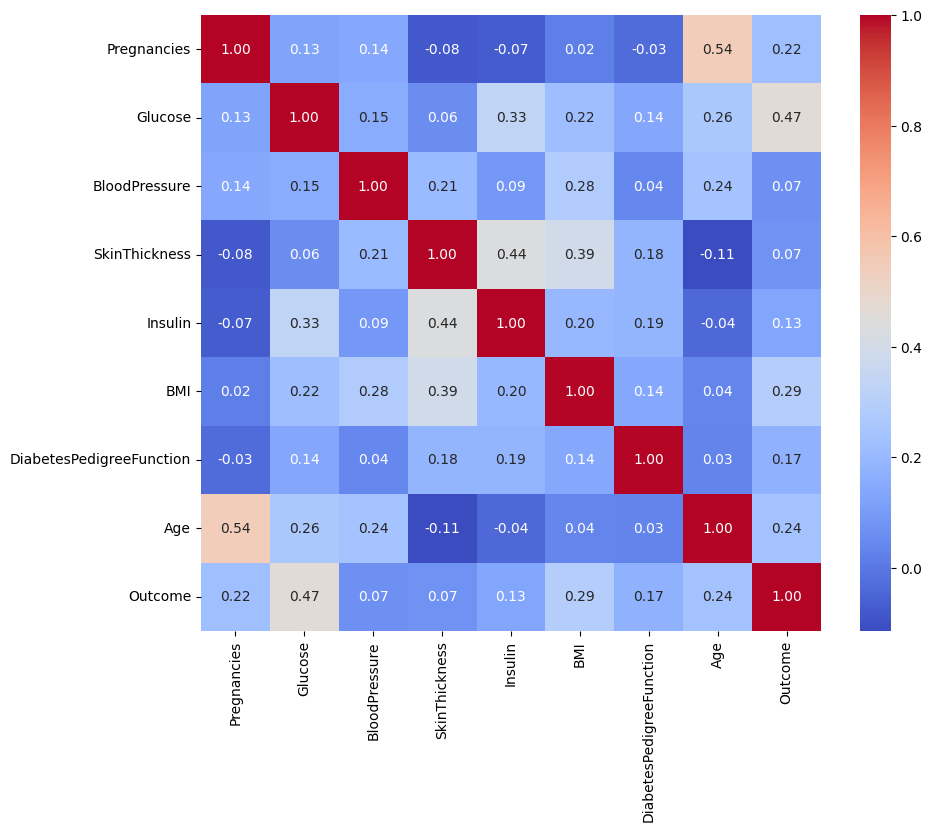

In [ ]:
# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

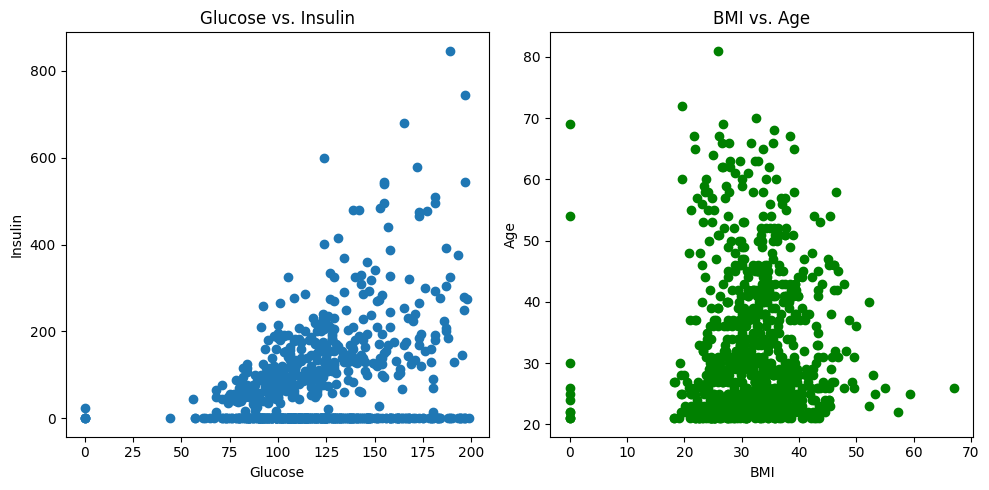

In [ ]:
# Create scatter plots
plt.figure(figsize=(10, 5))

# Scatter plot for Glucose vs. Insulin
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(data['Glucose'], data['Insulin'])
plt.title('Glucose vs. Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

# Scatter plot for BMI vs. Age
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(data['BMI'], data['Age'], color='green')
plt.title('BMI vs. Age')
plt.xlabel('BMI')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

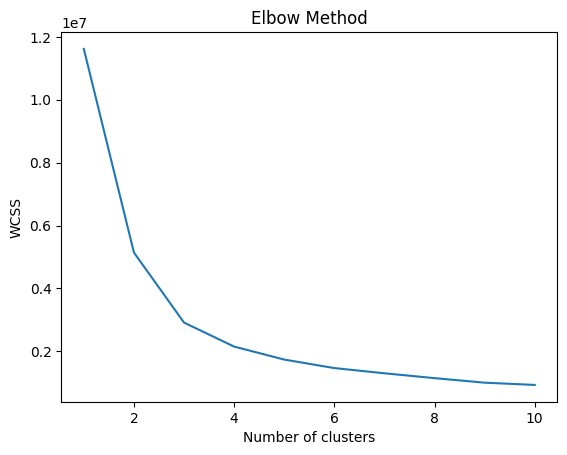

In [ ]:
# Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
df = pd.DataFrame(data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels back to the DataFrame
df['Cluster'] = clusters

# Now you have the DataFrame with clusters named as data_cluster
# Output the first few rows of data_cluster to verify
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


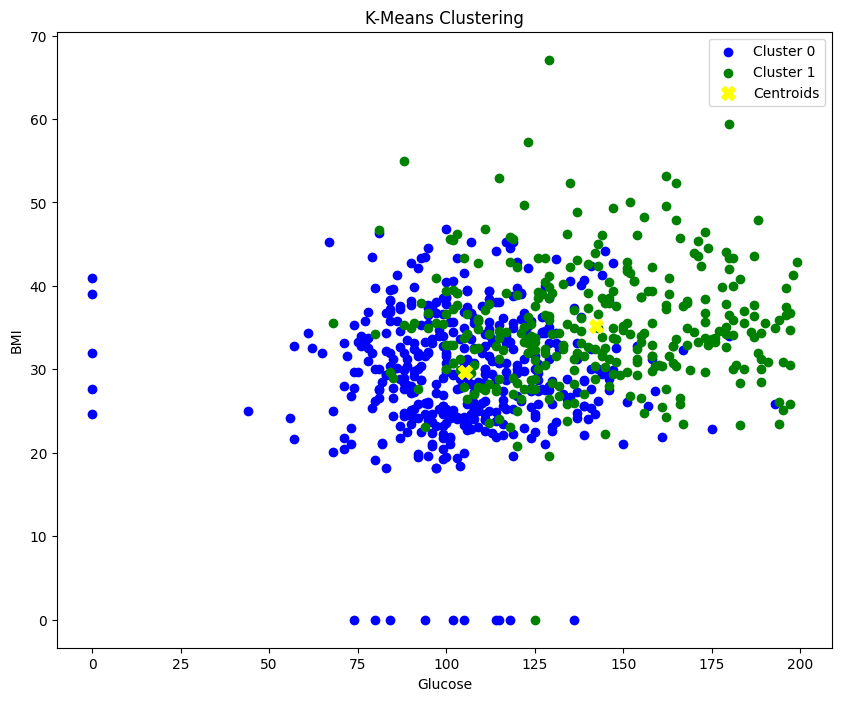

In [ ]:
# Choose two features to plot, 'Glucose' and 'BMI'
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
for cluster in range(2):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Glucose'], clustered_data['BMI'], color=colors[cluster], label=f'Cluster {cluster}')

# Plot the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)[:, [df.columns.get_loc('Glucose'), df.columns.get_loc('BMI')]]
plt.scatter(centroids[:, 0], centroids[:, 1], color='yellow', marker='X', s=100, label='Centroids')

# Label the axes and add a legend
plt.title('K-Means Clustering')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

# **Machine Learning**

In [6]:
# features
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age' ]]
# predicted variable
Y = data['Outcome']

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Predicting the target variable for test datset
predictions = model.predict(X_test)

In [ ]:
data_input = {'Pregnancies' : 2, 'Glucose': 92, 'BloodPressure': 67, 'SkinThickness': 25, 'Insulin': 0, 'BMI': 43.1, 'DiabetesPedigreeFunction': 0.167, 'Age': 35}
index = [1]
frank_df = pd.DataFrame(data_input,index)
frank_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,2,92,67,25,0,43.1,0.167,35


In [ ]:
prediction_frank = model.predict(frank_df)
print("Diabetes prediction for Frank is : ",prediction_frank)

Diabetes prediction for Frank is :  [0.27225647]


In [ ]:
data_input = {'Pregnancies' : 3, 'Glucose': 120, 'BloodPressure': 72, 'SkinThickness': 38, 'Insulin': 120, 'BMI': 35, 'DiabetesPedigreeFunction': 2.288, 'Age': 50}
index = [1]
tori_df = pd.DataFrame(data_input,index)
tori_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,3,120,72,38,120,35,2.288,50


In [ ]:
prediction_tori = model.predict(tori_df)
print("Diabetes prediction for Frank is : ",prediction_tori)

Diabetes prediction for Frank is :  [0.72268239]


In [10]:
#create list of model and accuracy dicts
perform_list = [ ]

In [11]:
def run_model(model_name, est_c, est_pnlty):
  mdl=''
  if model_name == 'Logistic Regression':
    mdl = LogisticRegression()
  elif model_name == 'Random Forest':
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
  elif model_name == 'Multinomial Naive Bayes':
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)
  elif model_name == 'Support Vector Classifer':
    mdl = SVC()
  elif model_name == 'Decision Tree Classifier':
    mdl = DecisionTreeClassifier()
  elif model_name == 'K Nearest Neighbour':
    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
  elif model_name == 'Gaussian Naive Bayes':
    mdl = GaussianNB()
  oneVsRest = OneVsRestClassifier(mdl)
  oneVsRest.fit(X_train, Y_train)
  y_pred = oneVsRest.predict(X_test)
  # Performance metrics
  accuracy = round(accuracy_score(Y_test, y_pred) * 100, 2)
  # Get precision, recall, f1 scores
  precision, recall, f1score, support = score(Y_test, y_pred, average='micro')
  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
  print(f'Precision : {precision}')
  print(f'Recall : {recall}')
  print(f'F1-score : {f1score}')
  # Add performance parameters to list
  perform_list.append(dict([
  ('Model', model_name),
  ('Test Accuracy', round(accuracy, 2)),
  ('Precision', round(precision, 2)),
  ('Recall', round(recall, 2)),
  ('F1', round(f1score, 2))
]))

In [12]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 78.35
Precision : 0.7835497835497836
Recall : 0.7835497835497836
F1-score : 0.7835497835497836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 77.92
Precision : 0.7792207792207793
Recall : 0.7792207792207793
F1-score : 0.7792207792207793


In [14]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 61.47
Precision : 0.6147186147186147
Recall : 0.6147186147186147
F1-score : 0.6147186147186147


In [15]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 73.59
Precision : 0.7359307359307359
Recall : 0.7359307359307359
F1-score : 0.7359307359307359


In [16]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 67.97
Precision : 0.6796536796536796
Recall : 0.6796536796536796
F1-score : 0.6796536796536796


In [17]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 77.49
Precision : 0.7748917748917749
Recall : 0.7748917748917749
F1-score : 0.7748917748917749


In [18]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.62
Precision : 0.7662337662337663
Recall : 0.7662337662337663
F1-score : 0.7662337662337663


In [19]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,78.35,0.78,0.78,0.78
1,Random Forest,77.92,0.78,0.78,0.78
2,Multinomial Naive Bayes,61.47,0.61,0.61,0.61
3,Support Vector Classifer,73.59,0.74,0.74,0.74
4,Decision Tree Classifier,67.97,0.68,0.68,0.68
5,K Nearest Neighbour,77.49,0.77,0.77,0.77
6,Gaussian Naive Bayes,76.62,0.77,0.77,0.77


In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [21]:
data_input = {'Pregnancies' : 2, 'Glucose': 92, 'BloodPressure': 67, 'SkinThickness': 25, 'Insulin': 0, 'BMI': 43.1, 'DiabetesPedigreeFunction': 0.167, 'Age': 35}
index = [1]
frank_df = pd.DataFrame(data_input,index)
frank_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,2,92,67,25,0,43.1,0.167,35


In [26]:
prediction_frank = logreg.predict(frank_df)
result = ""
if (prediction_frank == 0):
  result = "The patient's data does not indicate any signs of diabeties."
elif (prediction_frank == 1):
  result = "The patient may be at risk for diabeties. Please run A1C and blood sugar tests for the patient."
print("Diabetes prediction for Frank is : ", result)

Diabetes prediction for Frank is :  The patient's data does not indicate any signs of diabeties.


In [30]:
data_input = {'Pregnancies' : 3, 'Glucose': 120, 'BloodPressure': 72, 'SkinThickness': 38, 'Insulin': 120, 'BMI': 35, 'DiabetesPedigreeFunction': 2.288, 'Age': 50}
index = [1]
ruby_df = pd.DataFrame(data_input,index)
ruby_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,3,120,72,38,120,35,2.288,50


In [32]:
prediction_ruby = logreg.predict(ruby_df)
result = ""
if (prediction_ruby == 0):
  result = "The patient's data does not indicate any signs of diabeties."
elif (prediction_ruby == 1):
  result = "The patient may be at risk for diabeties. Please run A1C and blood sugar tests for the patient."
print("Diabetes prediction for Ruby is : ", result)

Diabetes prediction for Ruby is :  The patient may be at risk for diabeties. Please run A1C and blood sugar tests for the patient.


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[125  24]
 [ 33  49]]


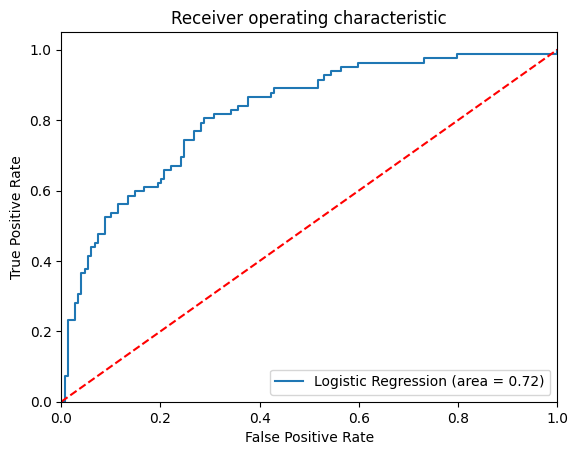

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()